In [1]:
import matplotlib.pylab as plt
import pandas as pd
import datetime as dt

# Feature Engeneering for Bike Sharing Dataset

In [2]:
# loading of original dataset
train = pd.read_csv('data/kaggle/train.csv', error_bad_lines=False)
test = pd.read_csv('data/kaggle/test.csv', error_bad_lines=False)

In [3]:
def to_date(str_date):
    return dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')

def to_day_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.toordinal() - dt.datetime(date.year, 1, 1).toordinal() + 1

def to_month_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.month

def to_day_of_week(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.weekday()

def to_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.year

def to_hour(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.hour

In [4]:
# add date/time features
train.loc[:,'year'] = train['datetime'].map(to_year)
train.loc[:,'month'] = train['datetime'].map(to_month_of_year)
train.loc[:,'weekday'] = train['datetime'].map(to_day_of_week)
train.loc[:,'day'] = train['datetime'].map(to_day_of_year)
train.loc[:,'hour'] = train['datetime'].map(to_hour)
del(train['datetime'])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,1,4


In [5]:
test.loc[:,'year'] = test['datetime'].map(to_year)
test.loc[:,'month'] = test['datetime'].map(to_month_of_year)
test.loc[:,'weekday'] = test['datetime'].map(to_day_of_week)
test.loc[:,'day'] = test['datetime'].map(to_day_of_year)
test.loc[:,'hour'] = test['datetime'].map(to_hour)
#del(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,4


### Random Forest Classifier
replace zero-values using Random Forest Classifier as per the article [here](https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d).

In [6]:
from sklearn.ensemble import RandomForestClassifier

wCol= ["season","weather","humidity","month","temp","year","atemp"]

dataWind0 = train[train["windspeed"]==0]
dataWindNot0 = train[train["windspeed"]!=0]
dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

rfModel_wind = RandomForestClassifier()
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
dataWind0["windspeed"] = wind0Values
train = dataWindNot0.append(dataWind0)
train["windspeed"] = train["windspeed"].astype("float")
train.reset_index(inplace=True)
train.drop('index',inplace=True,axis=1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Add Features from Past

In [7]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour
0,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,1,5
1,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,5,1,10
2,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,5,1,11
3,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,5,1,12
4,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,5,1,13


In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,4


## Decision Tree Regressor
Predicting *count* with teh decision tree regressor

In [9]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X = train.drop(['casual','registered','count'], axis=1)
y = train['count']

Automatically created module for IPython interactive environment


In [10]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
# Predict
X_test = X
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

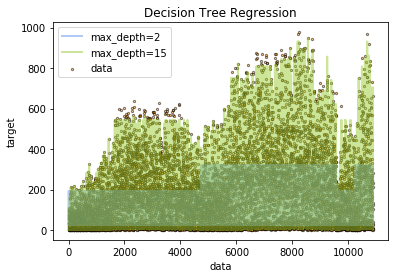

In [12]:
# Plot the results
plt.figure()
plt.scatter(X.index, y, s=5, edgecolor="black", c="darkorange", label="data",alpha=0.5)
plt.plot(X_test.index, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2,alpha=0.5)
plt.plot(X_test.index, y_2, color="yellowgreen", label="max_depth=15", linewidth=2,alpha=0.5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_1))) 

Mean Absolute Error: 98.90591782670423
Mean Squared Error: 19539.342465176986
Root Mean Squared Error: 139.7831980789429


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_2))) 

Mean Absolute Error: 7.937913950476256
Mean Squared Error: 303.7215485293481
Root Mean Squared Error: 17.427608801248326


In [15]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [16]:
rmsle(y, y_1)

0.9228020915189369

In [17]:
rmsle(y, y_2)

0.10735703241435382

In [18]:
test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
      'humidity', 'windspeed', 'year', 'month', 'weekday', 'day', 'hour']].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,4


In [19]:
results = regr_2.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                               'humidity', 'windspeed', 'year', 'month', 'weekday', 'day', 'hour']])
result_df = test.copy()
result_df["count"] = results
result_df["count"] = result_df["count"].astype(int)

In [20]:
result_df[['datetime','count']].head()

,datetime,count
0,2011-01-20 00:00:00,9
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,16
3,2011-01-20 03:00:00,4
4,2011-01-20 04:00:00,1


In [21]:
result_df[['datetime','count']].to_csv('bsd_submission.csv', index=False)

In [22]:
lb = pd.read_csv('publicleaderboarddata/bike-sharing-demand-publicleaderboard.csv')
lb.head()

,TeamId,TeamName,SubmissionDate,Score
0,97125,Mania Yang,2014-05-29 03:39:08,4.76188
1,97148,Francis,2014-05-29 07:26:46,0.62413
2,97154,Deep Learner (Rahul Mohan),2014-05-29 07:56:23,4.76188
3,97154,Deep Learner (Rahul Mohan),2014-05-29 08:43:26,1.84122
4,97154,Deep Learner (Rahul Mohan),2014-05-29 08:46:51,1.84099


In [80]:
import numpy as np
import matplotlib.pylab as plt

in1scores = lb[lb['Score']<1]

print("max",in1scores['Score'].max())
print("min",in1scores['Score'].min())

d = in1scores.reset_index().reset_index()
d['index'] = d['level_0']
del(d['level_0'])
d.set_index('index')

max 0.99925
min 0.0


,TeamId,TeamName,SubmissionDate,Score
index,,,,
0,97148,Francis,2014-05-29 07:26:46,0.62413
1,97225,Stephen Helms,2014-05-29 16:19:59,0.55705
2,97314,razgon,2014-05-30 06:55:43,0.55609
3,97314,razgon,2014-05-30 07:05:30,0.55239
4,97148,Francis,2014-05-30 09:58:30,0.62197
5,97225,Stephen Helms,2014-05-30 11:11:11,0.53531
6,97314,razgon,2014-05-30 11:21:49,0.45255
7,97308,Vivek Aditya,2014-05-30 12:55:04,0.75507
8,97306,Hong,2014-05-30 17:38:10,0.66761


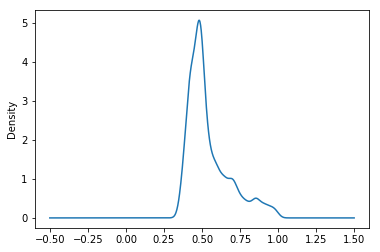

In [82]:
d['Score'].plot.kde()
plt.show()

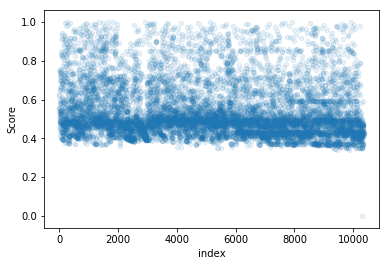

In [83]:
d[["index","Score"]].plot.scatter(x="index",y="Score", alpha=0.1)
plt.show()

In [86]:
print("5%",np.percentile(d['Score'], 5))
print("10%",np.percentile(d['Score'], 10))
print("15%",np.percentile(d['Score'], 15))
print("20%",np.percentile(d['Score'], 20))
print("25%",np.percentile(d['Score'], 25))
print("30%",np.percentile(d['Score'], 30))
print("35%",np.percentile(d['Score'], 35))
print("40%",np.percentile(d['Score'], 40))
print("45%",np.percentile(d['Score'], 45))
print("50%",np.percentile(d['Score'], 50))
print("55%",np.percentile(d['Score'], 55))
print("60%",np.percentile(d['Score'], 60))
print("65%",np.percentile(d['Score'], 65))
print("70%",np.percentile(d['Score'], 70))
print("75%",np.percentile(d['Score'], 75))
print("80%",np.percentile(d['Score'], 80))
print("85%",np.percentile(d['Score'], 85))
print("90%",np.percentile(d['Score'], 90))
print("95%",np.percentile(d['Score'], 95))

5% 0.39126
10% 0.40929
15% 0.422
20% 0.43304
25% 0.44590250000000003
30% 0.460175
35% 0.46939
40% 0.47916000000000003
45% 0.48681749999999996
50% 0.49522
55% 0.5029625000000001
60% 0.5170600000000001
65% 0.5374325
70% 0.565985
75% 0.59888
80% 0.6438
85% 0.6939975
90% 0.751115
95% 0.85376
